In [1]:
# unit test
import unittest
# test data
import medmnist
from medmnist import INFO

# pytorch and torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import Compose
import torchvision.transforms

# data storage
from PIL import Image, ImageDraw
import numpy as np

# visualisation
import matplotlib.pyplot as plt

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

# own module
from dataset.transform import *

['../helper', './helper', 'helper', 'C:\\Users\\Prinzessin\\projects\\decentnet\\datasceyence\\examples', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\python39.zip', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\DLLs', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta', '', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Prinzessin\\.ipython']


In [2]:
class UnitTestTransform(unittest.TestCase):
    
    def test_train_transforms(self):
        
        image_size = 512
        item = None
    
        # get one example image from medmnist
        info = INFO['retinamnist']
        DataClass = getattr(medmnist, info['python_class'])
        train_dataset = DataClass(split='train', download=True)       
        image, label = train_dataset.__getitem__(1)
        
        # transform list
        transform_list = [ 
                        ResizeCrop(image_size=image_size),
                        RandomAugmentations(),
                        CircleMask(),
                        RandomHorizontalFlip(),
                        RandomVerticalFlip(),
                        ToTensor(),
                        Normalise(),
                        RandomErasing()
                 ]
        self.transforms = Compose(transform_list)
        
        # testing image 10 times
        for a in range(0, 10):
            
            # generate dummy masks
            mask1 = Image.new('L', image.size, (0))
            draw = ImageDraw.Draw(mask1)
            draw.line((20, 10, 3, 20), fill=(255), width=10)
            mask2 = Image.new('L', image.size, (0))
            draw = ImageDraw.Draw(mask2)
            draw.line((2, 10, 3, 20), fill=(255), width=10)
            
            item = {
                'img'         : image,
                'msk_lesion'  : mask1, # Image.new("L",   (500, 500), (0)),
                'msk_drusen'  : mask2,
                'lbl_lat'     : 1
            }

            if self.transforms:
                item = self.transforms(item)
              
            # plot
            fig, axs = plt.subplots(1,3, facecolor='w', edgecolor='k')
            axs[1].set_title(str(item["lbl_lat"]))
            reverse = torchvision.transforms.ToPILImage()
            i = 0
            axs[i].imshow(np.asarray(reverse(item["img"])))
            i += 1
            axs[i].imshow(np.asarray(reverse(item["msk_lesion"])))
            i += 1
            axs[i].imshow(np.asarray(reverse(item["msk_drusen"])))
            
            # check size
            self.assertEqual(item["img"].shape[1:3], (image_size, image_size))
            self.assertEqual(item["msk_lesion"].shape[1:3], (image_size, image_size))
            self.assertEqual(item["msk_drusen"].shape[1:3], (image_size, image_size))
        
    def ut_interference(self):
        pass


Using downloaded and verified file: C:\Users\Prinzessin\.medmnist\retinamnist.npz


.
----------------------------------------------------------------------
Ran 1 test in 2.576s

OK


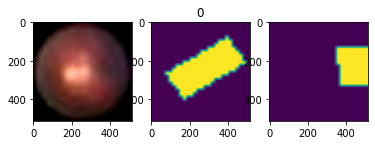

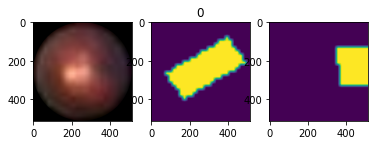

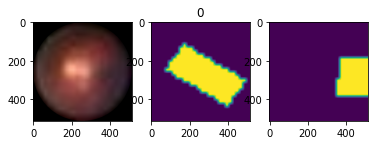

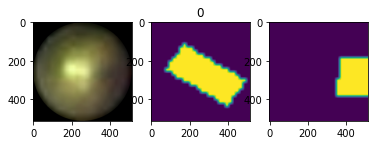

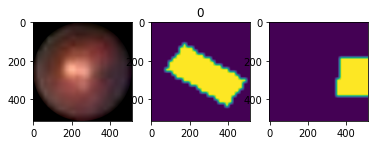

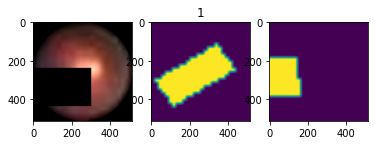

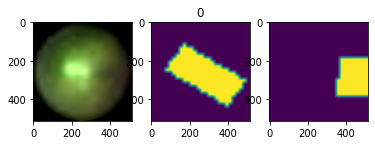

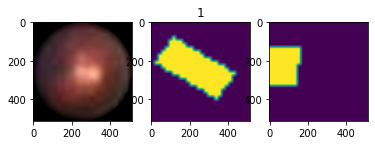

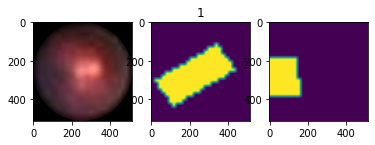

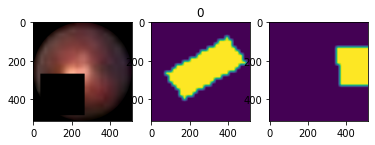

In [3]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)